Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?











In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('states_all.csv')

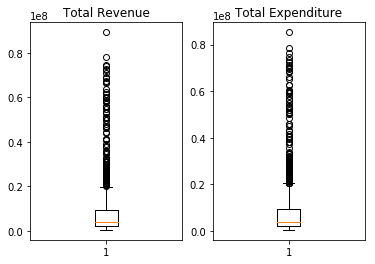

In [45]:
df.TOTAL_REVENUE = df.TOTAL_REVENUE.interpolate()
df.TOTAL_EXPENDITURE = df.TOTAL_EXPENDITURE.interpolate()
plt.subplot(1,2,1)
plt.boxplot(df.TOTAL_REVENUE)
plt.title('Total Revenue')

plt.subplot(1,2,2)
plt.boxplot(df.TOTAL_EXPENDITURE)
plt.title('Total Expenditure')
plt.show()

In [ ]:
# Çok fazla aykırı değer mevcuttur.

Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

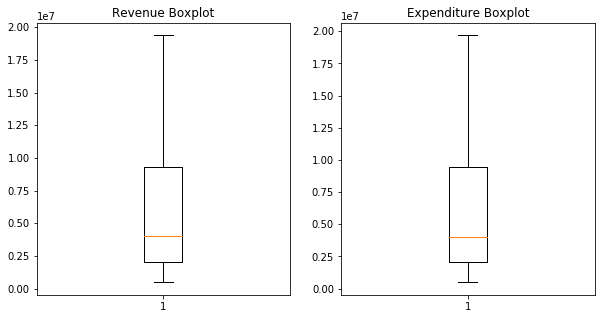

In [55]:
winsorize_revenue = winsorize(df.TOTAL_REVENUE, (0,0.10))
winsorize_expenditure = winsorize(df.TOTAL_EXPENDITURE, (0,0.10))
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(winsorize_revenue)
plt.title('Revenue Boxplot')

plt.subplot(1,2,2)
plt.boxplot(winsorize_expenditure)
plt.title('Expenditure Boxplot')
plt.show()

Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

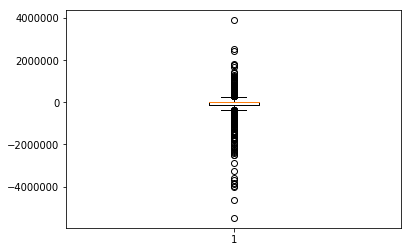

In [51]:
df['BUTCE_ACİGİ'] = df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE
plt.boxplot(df['BUTCE_ACİGİ'])
plt.show()

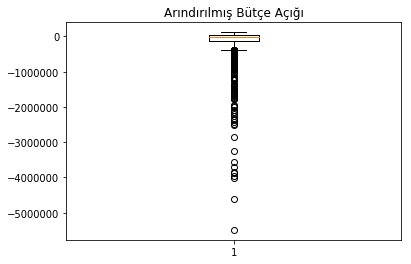

In [57]:
df['BUTCE_ACİGİ'] = winsorize(df['BUTCE_ACİGİ'],(0,0.15))
plt.boxplot(df['BUTCE_ACİGİ'])
plt.title('Arındırılmış Bütçe Açığı')
plt.show()

Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

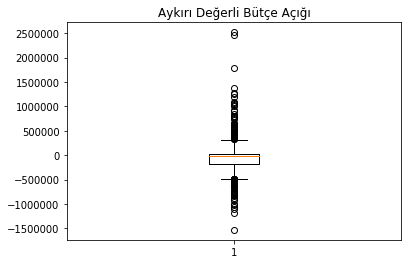

In [54]:
df['BUTCE_ACİGİ_2'] = winsorize_revenue - winsorize_expenditure
plt.boxplot(df['BUTCE_ACİGİ_2'])
plt.title('Aykırı Değerli Bütçe Açığı')
plt.show()

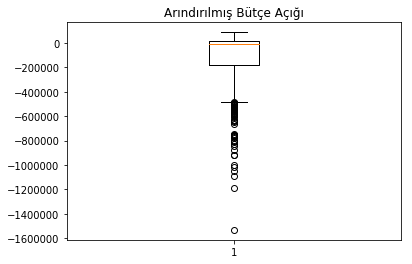

In [56]:
df['YENİ_BUTCE_ACİGİ'] = winsorize(df['BUTCE_ACİGİ_2'], (0,0.15))
plt.boxplot(df['YENİ_BUTCE_ACİGİ'])
plt.title('Arındırılmış Bütçe Açığı')
plt.show()

Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz?


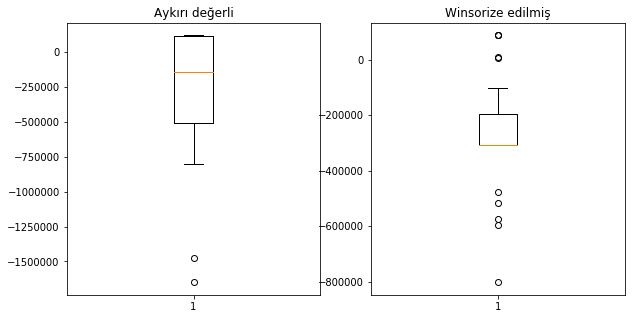

In [73]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(df[df['STATE']== 'ILLINOIS']['BUTCE_ACİGİ'])
plt.title('Aykırı değerli')

plt.subplot(1,2,2)
plt.boxplot(df[df['STATE']== 'ILLINOIS']['YENİ_BUTCE_ACİGİ'])
plt.title('Winsorize edilmiş')
plt.show()

Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

In [74]:
#Üçüncü sorudaki yöntem daha iyi olurdu.